## Pick stimulus

- from initial reading of max and mins

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [2]:
bID = 's_b1555_22'
SAVE_PATH = PROCESSED_DIR / bID / 'shuffle_tmf.pickle'

In [3]:
import pandas as pd

In [4]:
shuffle_tmf = pd.read_pickle(SAVE_PATH)

In [5]:
shuffle_wavs = shuffle_tmf.shuffle_wavs.values

## Original calculation. 

In [6]:
shuffle_tmf.head()

,index,shuffle_wavs,shuffle_og_seg,shuffle_ts,seg_nb,type
18,18,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-01_1611695_1641...,33.540317,0,max
1,1,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-01_1611695_1641...,13.189624,0,min
3,35,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-02_1242225_1285...,48.723433,1,max
30,62,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-02_1242225_1285...,24.444802,1,min
19,83,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-02_1242225_1285...,43.137802,2,max


In [7]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

/tmp/ipykernel_31246/123448108.py:2: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [8]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

## Do a power analysis

In [17]:
import numpy as np
from statsmodels.stats.power import FTestAnovaPower
import matplotlib.pyplot as plt

In [22]:
solver = FTestAnovaPower()
solver.solve_power(effect_size = 0.25, nobs = 48, alpha = 0.05, power = None)

0.395990434731053

## Do a sanity test of T

In [11]:
%%time

with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    shuffle_ts = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(shuffle_wavs, desc = 'shuffle')
    )

shuffle:  50%|█████     | 504/1000 [03:32<03:55,  2.11it/s]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
shuffle: 100%|██████████| 1000/1000 [07:15<00:00,  2.30it/s]


CPU times: user 2.03 s, sys: 1.29 s, total: 3.32 s
Wall time: 8min 7s


In [12]:
shuffle_tmf['sanity_tmf'] = shuffle_ts

In [13]:
shuffle_tmf

,index,shuffle_wavs,shuffle_og_seg,shuffle_ts,seg_nb,type,sanity_tmf
18,18,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-01_1611695_1641...,33.540317,0,max,23.279555
1,1,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-01_1611695_1641...,13.189624,0,min,12.311960
3,35,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-02_1242225_1285...,48.723433,1,max,46.688159
30,62,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-02_1242225_1285...,24.444802,1,min,27.277788
19,83,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-20_09-00-01-02_1242225_1285...,43.137802,2,max,42.292035
...,...,...,...,...,...,...,...
15,15919,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_21-00-01-02_1004735_1051...,41.725690,497,min,54.453983
22,15958,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_21-00-01-02_1004735_1051...,57.690444,498,max,63.989083
15,15951,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_21-00-01-02_1004735_1051...,20.800937,498,min,21.407516
27,15995,/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...,s_b1555_22_2022-09-29_21-00-01-02_844145_87959...,42.612415,499,max,32.853170


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='shuffle_ts', ylabel='Count'>

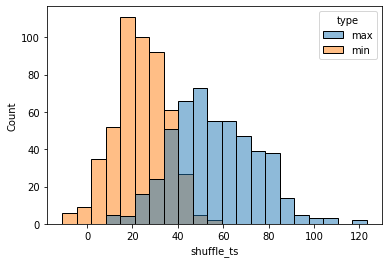

In [15]:
sns.histplot(data = shuffle_tmf.reset_index(), x = 'shuffle_ts', hue = 'type')

<AxesSubplot:xlabel='sanity_tmf', ylabel='Count'>

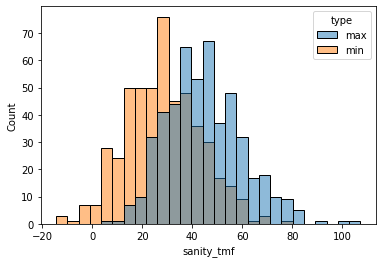

In [16]:
sns.histplot(data = shuffle_tmf.reset_index(), x = 'sanity_tmf', hue = 'type')

In [17]:
## we know from this that there is a population difference when we run a second time. 
## Let's run 100 ts of each segment, and take the sample mean, and take that as the true t statistic of the recording

In [18]:
def tmf_n(
    address, 
    ns = 32, 
    amp_env_sr = 200,
    nt = 36
):
    SDoTMF = []
    for i in np.arange(0, nt):
        SDoTMF.append(tmf(address, ns = ns, amp_env_sr = amp_env_sr, hilbert_artifacts = True))
    
    return SDoTMF

In [19]:
tester = shuffle_wavs[0]

In [20]:
tester

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-shuffle/s_b1555_22_2022-09-20_09-00-01-01_1611695_1641125_seg_20.0_30.0_templatingFalse-shuffle_26_.wav')

In [21]:
tmf_n(tester, nt = 3)

[28.310736633737495, 21.68673077125807, 22.51500008604709]

In [ ]:
%%time

with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    SDoTMF = parallel(
        delayed(tmf_n)(
            address,
            ns = 32,
            amp_env_sr = 200,
            nt = 100
        )
        for address in tqdm(shuffle_wavs, desc = 'shuffle')
    )

shuffle:   8%|▊         | 84/1000 [25:27<4:37:39, 18.19s/it]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
shuffle:  34%|███▎      | 336/1000 [3:29:25<7:53:28, 42.78s/it]

In [ ]:
shuffle_tmf['SDoTMF'] = SDoTMF

In [ ]:
shuffle_tmf

In [ ]:
## Pickle dataframe

In [ ]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [ ]:
SAVE_PATH = PROCESSED_DIR / bID / 'shuffle_tmf_SDoTMF.pickle'
ensure_dir(SAVE_PATH)

In [ ]:
shuffle_tmf.to_pickle(SAVE_PATH)